In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## ==================== Part 1: Logistic Regression ====================
data = pd.read_csv('ex2data1.txt', sep=',', names=['Exame1 Score', 'Exame2 Score', 'Pass'])
data.head()

,Exame1 Score,Exame2 Score,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pos = data[data['Pass'] == 1]
neg = data[data['Pass'] == 0]

# pos = data[data['Pass'].isin([1])]
# neg = data[data['Pass'].isin([0])]

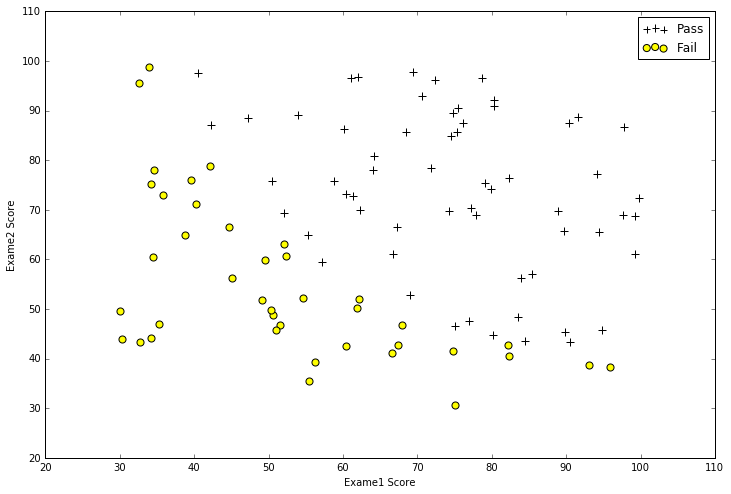

In [4]:
# pos.plot(data['Exame1 Score'], data['Exame2 Score'], s=50, c='b')
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pos['Exame1 Score'], pos['Exame2 Score'], c='black', marker='+', s=50, label='Pass')
ax.scatter(neg['Exame1 Score'], neg['Exame2 Score'], c='yellow', marker='o', s=50, label='Fail')
ax.legend()
ax.set_xlabel('Exame1 Score')
ax.set_ylabel('Exame2 Score')

In [5]:
# sigmoid function
import math

# cannot used in list
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

sigmoid2 = lambda x: .5 * (math.tanh(.5 * x) + 1)

# vector operation
sigmoid3 = lambda x: (1 / (1 + np.exp(-x)))
# sigmoid(0.485)
# sigmoid3(0.485)

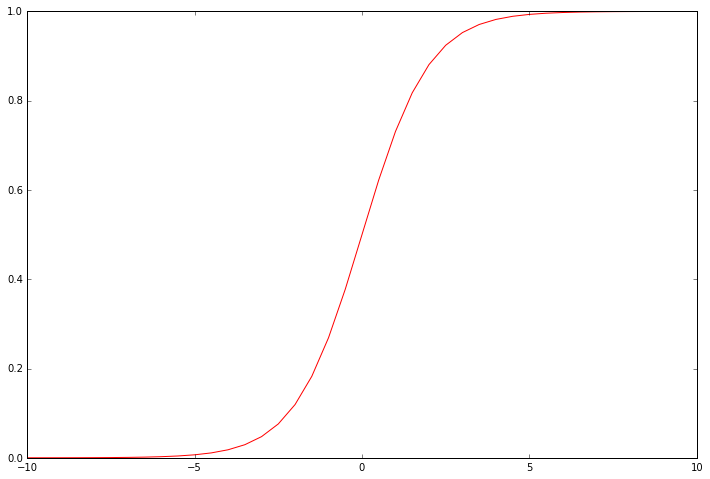

In [6]:
# plot sigmoid function
nums = np.arange(-10, 10, step=0.5)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid3(nums), 'r')

In [7]:
# Cost Function
def cost(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta.T)   
    [m, n] = X.shape
    
#  (m x n) * (n x 1) = (m x 1)
    h = sigmoid3(X * theta.T)
    
#     first  = np.multiply(-y.T * np.log(h))
#     second = np.multiply((1 - y).T * np.log(1 - h))
    first = -y.T * np.log(h)
    second = (1 - y).T * np.log(1 - h)
    J_theta = np.sum(first - second) / m
    
    return J_theta

In [8]:
# Gradient Function
def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta.T)
    [m, n] = X.shape
    grad = np.zeros(n)

    error = sigmoid3(X * theta.T) - y   # (m x 1)
    
    for j in range(n):
        theta_j = np.multiply(error, X[:, j])
        grad[j] = np.sum(theta_j) / m
        
    return grad

In [9]:
data.insert(0, 'Ones', 1)

In [10]:
[m, n] = data.shape
X = data.iloc[:, 0: n - 1]
y = data.iloc[:, n-1 : n]

X = np.matrix(X.values)
y = np.matrix(y.values)

theta = np.zeros((3, 1))

In [11]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3, 1))

In [12]:
print('cost  = ', cost(theta, X, y))
print('theta = ', gradient(theta, X, y))

cost  =  0.69314718056
theta =  [ -0.1        -12.00921659 -11.26284221]


In [13]:
import scipy.optimize as opt

In [14]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [15]:
cost(result[0], X, y)

0.20349770158947464

In [16]:
# predict function
def predict(theta, X):
    probability = sigmoid3(X * theta.T)
    return [1 if x >= .5 else 0 for x in probability]

In [17]:
theta_min = np.matrix(result[0])
theta_min
predictions = predict(theta_min, X)
correct = [1 if (a == b) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('Accuracy = {0}%'.format(accuracy))          

Accuracy = 89%


In [18]:
# plot dicision boundary

In [19]:
## ==================== Part 2: Regularized Logistic Regression ====================
data2 = pd.read_csv('ex2data2.txt', sep=',', names=['Test1', 'Test2', 'Pass'])
data2.head()

pos = data2[data2['Pass'] == 1]
neg = data2[data2['Pass'] == 0]


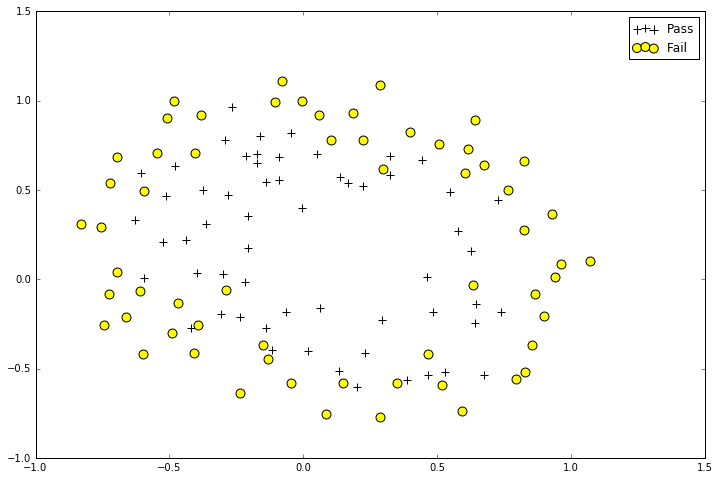

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pos['Test1'], pos['Test2'], c='black', marker='+', s=80, label='Pass')
ax.scatter(neg['Test1'], neg['Test2'], c='yellow', marker='o', s=80, label='Fail')
ax.legend()

In [21]:
# Feature Mapping
def mapFeatures(data2):
    degree = 6
    data2.insert(3, 'Ones', 1)
    X1 = data2['Test1']
    X2 = data2['Test2']
    
    for i in range(degree):
        for j in range(i):
            data2['F' + str(i) + str(j)] = np.power(X1, i - j) * np.power(X2, j)

In [22]:
mapFeatures(data2)
data2.head()

,Test1,Test2,Pass,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,0.051267,0.69956,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,-0.092742,0.68494,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,-0.213710,0.69225,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,-0.375000,0.50219,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,-0.513250,0.46564,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


In [23]:
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)
data2.head()

,Pass,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


In [24]:
def costWithReg(theta, X, y, learningRate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta.T)   
    [m, n] = X.shape
    
#  (m x n) * (n x 1) = (m x 1)
    h = sigmoid3(X * theta.T)

    first = -y.T * np.log(h)
    second = (1 - y).T * np.log(1 - h)
#   not include theta1
    reg = (learningRate / 2) * np.sum(np.power(theta[:, 1:n], 2))
    J_theta = np.sum(first - second) / m + reg
    
    return J_theta

In [25]:
def gradientWithReg(theta, X, y, learningRate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta.T)
    [m, n] = X.shape
    grad = np.zeros(n)

    error = sigmoid3(X * theta.T) - y   # (m x 1)
    
    for j in range(n):
        theta_j = np.multiply(error, X[:, j])
        reg = (learningRate / m) * theta[:, j]
        if (j == 0) :
            grad[j] = np.sum(theta_j) / m
        else:
            grad[j] = np.sum(theta_j) / m + reg
        
    return grad

In [26]:
[m, n] = data2.shape
m, n

(118, 17)

In [27]:
X2 = data2.iloc[:, 1 : n]
y2 = data2.iloc[:, 1]

In [28]:
X2.head()

,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43,F50,F51,F52,F53,F54
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551,3.541519e-07,0.000005,0.000066,0.000900,0.012278
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128


In [29]:

y2.head()

0    1
1    1
2    1
3    1
4    1
Name: Ones, dtype: int64

In [30]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
y2

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])

In [31]:
theta2 = np.zeros((n-1, 1))
theta2

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [32]:
learningRate = 0.1
costWithReg(theta2, X2, y2.T, learningRate)

0.69314718055994529

In [33]:
gradientWithReg(theta2, X2, y2.T, learningRate)

array([-0.5       , -0.02738945, -0.12378767,  0.01273592, -0.02991666,
       -0.01534077, -0.00774126, -0.06126921,  0.00262552, -0.02521644,
        0.00552409, -0.02598254, -0.0059059 , -0.00471605, -0.0091389 ,
       -0.00204454])

In [34]:
result2 = opt.fmin_tnc(func=costWithReg, x0=theta2, fprime=gradientWithReg, args=(X2, y2.T, learningRate))
result2

(array([  1.50614968e+01,   3.77246607e-04,   3.56880023e-04,
          2.91624270e-05,  -1.66487504e-04,  -1.67718493e-04,
          2.77605113e-04,   1.66082937e-04,   2.68863232e-04,
         -6.31454469e-04,   6.96151107e-04,  -1.87191204e-04,
         -9.17245408e-06,  -5.20689927e-04,  -2.56441976e-05,
          1.29144093e-04]), 154, 0)

In [35]:
theta_min2 = np.matrix(result2[0])
predictions2 = predict(theta_min2, X2)
correct2 = [1 if (a == b) else 0 for (a, b) in zip(predictions2, y2.T)]
accuracy2 = (sum(map(int, correct2)) % len(correct2))
print('Accuracy = {0}%'.format(accuracy2))

Accuracy = 0%


In [36]:
## ==================== Part 3: Sklearn Linear Model ====================
from sklearn import linear_model
# model = linear_model.LogisticRegression(penalty='11', C=1.0)
model = linear_model.LogisticRegression()

In [37]:
data3 = pd.read_csv('ex2data2.txt', sep=',', names=['Test1', 'Test2', 'Pass'])
data3.head()

,Test1,Test2,Pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [38]:
data3.insert(0, 'Ones', 1)
data3.head()

,Ones,Test1,Test2,Pass
0,1,0.051267,0.69956,1
1,1,-0.092742,0.68494,1
2,1,-0.213710,0.69225,1
3,1,-0.375000,0.50219,1
4,1,-0.513250,0.46564,1


In [39]:
[m3, n3] = data3.shape
X3 = data3.iloc[:, 0 : n3 - 1]
y3 = data3.iloc[:, n3 - 1 : n3]
X3.head(), y3.head()

(   Ones     Test1    Test2
 0     1  0.051267  0.69956
 1     1 -0.092742  0.68494
 2     1 -0.213710  0.69225
 3     1 -0.375000  0.50219
 4     1 -0.513250  0.46564,    Pass
 0     1
 1     1
 2     1
 3     1
 4     1)

In [40]:
X3 = np.array(X3.values)
y3 = np.array(y3.values)
X3.shape, y3.shape

((118, 3), (118, 1))

In [41]:
model.fit(X3, y3) 

/Users/Chenson/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
model.score(X3, y3)

0.5423728813559322

In [43]:
# feature mapping
degree = 5
x1 = data3['Test1']
x2 = data3['Test2']

data3.drop('Ones', axis=1, inplace=True)
data3.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data3['F' + str(i) + str(j)] = np.power(x1, i - j) * np.power(x2, j)
        
data3.drop('Test1', axis=1, inplace=True)
data3.drop('Test2', axis=1, inplace=True)
data3.head()

,Pass,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [47]:
[m3, n3] = data3.shape
X3 = data3.iloc[:, 1 : n3]
y3 = data3.iloc[:, 0 : 1]
X3.head(), y3.head()

(   Ones       F10       F20       F21       F30       F31       F32       F40  \
 0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089  0.000007   
 1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509  0.000074   
 2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412  0.002086   
 3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573  0.019775   
 4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283  0.069393   
 
         F41       F42       F43  
 0  0.000094  0.001286  0.017551  
 1 -0.000546  0.004035 -0.029801  
 2 -0.006757  0.021886 -0.070895  
 3 -0.026483  0.035465 -0.047494  
 4 -0.062956  0.057116 -0.051818  ,    Pass
 0     1
 1     1
 2     1
 3     1
 4     1)

In [48]:
X3 = np.array(X3.values)
y3 = np.array(y3.values)
X3.shape, y3.shape

((118, 11), (118, 1))

In [49]:
model.fit(X3, y3) 
# model.score(X3, y3)

/Users/Chenson/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
model.score(X3, y3)

0.66101694915254239